In [1]:
import numpy as np
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
from bluepysnap import Circuit
from bluepysnap.bbp import Cell

# CircuitPath = 'O1_data_physiology/' # edges files not inclued in https://github.com/FernandoSBorges/

CircuitPath = 'O1_data_physiology/'
MorphologyPath = CircuitPath + 'morphologies/ascii/'
CellLibraryFile = CircuitPath + 'S1nonbarrel_neurons/nodes.h5'
METypePath = CircuitPath + 'emodels_hoc/'

lst_properties = [ 'etype', 'exc_mini_frequency', 'inh_mini_frequency', 'layer', 'me_combo', 'model_template', 'model_type', 'morph_class', 'morphology', 'mtype', 
                  'orientation_w', 'orientation_x', 'orientation_y', 'orientation_z', 'population', 'region', 'synapse_class', '@dynamics:holding_current', 
                  '@dynamics:input_resistance', '@dynamics:resting_potential', '@dynamics:threshold_current', 'x', 'y', 'z']

circuit_path = CircuitPath + 'circuit_config.json'
circuit = Circuit(circuit_path)

cells = circuit.nodes["S1nonbarrel_neurons"]

nodesinfo = cells.get()

def distance3D(gidpre,gidpost):
    return np.sqrt(np.power(nodesinfo['x'][gidpre]-nodesinfo['x'][gidpost],2)+np.power(nodesinfo['y'][gidpre]-nodesinfo['y'][gidpost],2)+np.power(nodesinfo['z'][gidpre]-nodesinfo['z'][gidpost],2))

def distance2D(gidpre,gidpost):
    return np.sqrt(np.power(nodesinfo['x'][gidpre]-nodesinfo['x'][gidpost],2)+np.power(nodesinfo['y'][gidpre]-nodesinfo['y'][gidpost],2))

def distance2Dmean(gidpre, mean_x, mean_y):
    return np.sqrt(np.power(nodesinfo['x_new'][gidpre]-mean_x,2)+np.power(nodesinfo['y_new'][gidpre]-mean_y,2))


mtypes = sorted(cells.property_values(Cell.MTYPE))

i = 0
mntypes = {}
for mn in sorted(mtypes):
    mntypes[mn] = i
    i+=1

print(mntypes)

{'L1_DAC': 0, 'L1_HAC': 1, 'L1_LAC': 2, 'L1_NGC-DA': 3, 'L1_NGC-SA': 4, 'L1_SAC': 5, 'L23_BP': 6, 'L23_BTC': 7, 'L23_CHC': 8, 'L23_DBC': 9, 'L23_LBC': 10, 'L23_MC': 11, 'L23_NBC': 12, 'L23_NGC': 13, 'L23_SBC': 14, 'L2_IPC': 15, 'L2_TPC:A': 16, 'L2_TPC:B': 17, 'L3_TPC:A': 18, 'L3_TPC:C': 19, 'L4_BP': 20, 'L4_BTC': 21, 'L4_CHC': 22, 'L4_DBC': 23, 'L4_LBC': 24, 'L4_MC': 25, 'L4_NBC': 26, 'L4_NGC': 27, 'L4_SBC': 28, 'L4_SSC': 29, 'L4_TPC': 30, 'L4_UPC': 31, 'L5_BP': 32, 'L5_BTC': 33, 'L5_CHC': 34, 'L5_DBC': 35, 'L5_LBC': 36, 'L5_MC': 37, 'L5_NBC': 38, 'L5_NGC': 39, 'L5_SBC': 40, 'L5_TPC:A': 41, 'L5_TPC:B': 42, 'L5_TPC:C': 43, 'L5_UPC': 44, 'L6_BP': 45, 'L6_BPC': 46, 'L6_BTC': 47, 'L6_CHC': 48, 'L6_DBC': 49, 'L6_HPC': 50, 'L6_IPC': 51, 'L6_LBC': 52, 'L6_MC': 53, 'L6_NBC': 54, 'L6_NGC': 55, 'L6_SBC': 56, 'L6_TPC:A': 57, 'L6_TPC:C': 58, 'L6_UPC': 59}


## Select nodes to simulate

In [2]:
f = open('node_sets.json') 
node_sets = json.load(f) 

mean_x, mean_y = np.mean(nodesinfo['x_new']), np.mean(nodesinfo['y_new'])
node_gid = [] 
nodepremtype_new = []    
mtype_new = []     

hex = 'hex0'
for gid in node_sets['hex0']['node_id']: 
    if 'L4' in nodesinfo['mtype'][gid] and distance2Dmean(gid, mean_x, mean_y) < 25.0 and 'INH' in nodesinfo['synapse_class'][gid]:  
        node_gid.append(gid)
        nodepremtype_new.append(mntypes[nodesinfo['mtype'][gid]])
        if nodesinfo['mtype'][gid] not in mtype_new:
            mtype_new.append(nodesinfo['mtype'][gid])

        # print(len(node_gid),gid,nodesinfo['synapse_class'][gid],nodesinfo['mtype'][gid],nodesinfo['model_template'][gid],hex,distance2Dmean(gid, mean_x, mean_y))

for gid in node_sets['hex0']['node_id']: 
    if 'L4' in nodesinfo['mtype'][gid] and distance2Dmean(gid, mean_x, mean_y) < 25.0 and 'EXC' in nodesinfo['synapse_class'][gid]:  
        node_gid.append(gid)
        nodepremtype_new.append(mntypes[nodesinfo['mtype'][gid]])
        if nodesinfo['mtype'][gid] not in mtype_new:
            mtype_new.append(nodesinfo['mtype'][gid])

        # print(len(node_gid),gid,nodesinfo['synapse_class'][gid],nodesinfo['mtype'][gid],nodesinfo['model_template'][gid],hex,distance2Dmean(gid, mean_x, mean_y))
            

            
# non central col
# for hex in node_sets['hex_O1']:
#     for gid in node_sets[hex]['node_id']:     
#         if 'L4' in nodesinfo['mtype'][gid] and distance2Dmean(gid, mean_x, mean_y) > 500.0 and distance2Dmean(gid, mean_x, mean_y) < 502.0:  
#             node_gid.append(gid)
#             nodepremtype_new.append(mntypes[nodesinfo['mtype'][gid]])
#             if nodesinfo['mtype'][gid] not in mtype_new:
#                 mtype_new.append(nodesinfo['mtype'][gid])

#             print(len(node_gid),gid,nodesinfo['mtype'][gid],hex,distance2Dmean(gid, mean_x, mean_y))        

# NetPyNE

In [3]:
from netpyne import specs, sim   

# Network parameters
netParams = specs.NetParams()  # object of class NetParams to store the network parameters

In [4]:
cellName_list = {}
cellName_list2 = []
gid_list = {}

Epops = []
Ipops = []

cellName_list2 = []

for gid in node_gid:

    cellName = nodesinfo['mtype'][gid] # + '_' + nodesinfo['etype'][gid]
        
    cellName_list2.append(cellName)
    
    cellName_list[gid] = cellName

    if cellName not in gid_list.keys():
        gid_list[cellName] = []
        if 'cADpyr' in cellName:
            Epops.append(cellName)
        else:
            Ipops.append(cellName)

    gid_list[cellName].append(gid)
    
    print('%d %s %d' % (gid,cellName, len(gid_list[cellName])))


138402 L4_NBC 1
142232 L4_MC 1
142352 L4_LBC 1
142804 L4_LBC 2
109126 L4_UPC 1
109354 L4_UPC 2
109632 L4_UPC 3
112531 L4_UPC 4
112935 L4_UPC 5
113019 L4_UPC 6
113207 L4_UPC 7
113680 L4_UPC 8
114264 L4_UPC 9
114284 L4_UPC 10
114352 L4_UPC 11
114599 L4_UPC 12
115007 L4_UPC 13
116011 L4_UPC 14
116420 L4_UPC 15
117199 L4_UPC 16
118008 L4_TPC 1
118052 L4_TPC 2
118445 L4_TPC 3
118551 L4_TPC 4
118903 L4_TPC 5
119782 L4_TPC 6
120403 L4_TPC 7
121387 L4_TPC 8
122954 L4_TPC 9
123320 L4_TPC 10
123553 L4_TPC 11
125451 L4_TPC 12
125547 L4_TPC 13
127227 L4_TPC 14
127289 L4_TPC 15
129252 L4_TPC 16
130055 L4_TPC 17
130094 L4_TPC 18
130103 L4_TPC 19
130190 L4_TPC 20
130206 L4_TPC 21
130325 L4_TPC 22
131332 L4_TPC 23
131667 L4_TPC 24
131862 L4_TPC 25
132504 L4_TPC 26
132706 L4_TPC 27
133289 L4_TPC 28
133293 L4_TPC 29
133426 L4_TPC 30
133580 L4_TPC 31
134949 L4_TPC 32
135332 L4_TPC 33
135956 L4_TPC 34
137561 L4_TPC 35
137858 L4_TPC 36
138968 L4_SSC 1
139754 L4_SSC 2
140346 L4_SSC 3
140931 L4_SSC 4
141017 

In [5]:
sorted(gid_list.keys()), gid_list[sorted(gid_list.keys())[0]]

(['L4_LBC', 'L4_MC', 'L4_NBC', 'L4_SSC', 'L4_TPC', 'L4_UPC'], [142352, 142804])

In [6]:
cellsList = {}
giderror = []

for popName in sorted(gid_list.keys()):

    cellsList[popName] = []

    try:
                
        for gid in gid_list[popName]:

            cellName = popName + "_gid_" + str(gid)

            # MorphoName = nodesinfo['morphology'][gid] + '.asc'

            hocName = nodesinfo['model_template'][gid][4:]  

            MorphologyPath = 'O1_data_physiology/morphologies2/ascii/'
            
            MorphoName = nodesinfo['morphology'][gid]+"_gid"+str(gid)+".asc"
                
            cellRule = netParams.importCellParams(label=cellName, somaAtOrigin=False,
                conds={'cellType': cellName, 'cellModel': 'HH_full'},
                fileName='O1_data_physiology/emodels_hoc2/' + hocName + '.hoc',
                cellName=hocName,
                cellInstance = False,
                cellArgs=[gid, MorphologyPath, MorphoName])
            

            mechs_pas = netParams.cellParams[cellName]['secs']['soma_0']['mechs']['pas']

            for axx in netParams.cellParams[cellName]['secLists']['axonal'][3:]:
                del netParams.cellParams[cellName]['secs'][axx]['mechs']
                netParams.cellParams[cellName]['secs'][axx]['mechs'] = {}
                netParams.cellParams[cellName]['secs'][axx]['mechs']['pas'] = mechs_pas
                netParams.cellParams[cellName]['secs'][axx]['geom']['cm'] = 0.02
                netParams.cellParams[cellName]['secs'][axx]['geom']['nseg'] = 1
                
            
            print(popName, cellName, hocName, netParams.cellParams[cellName]['secLists']['axonal'][-1])

            # for axx in netParams.cellParams[cellName]['secLists']['axonal'][:5]:
            #     print(axx,netParams.cellParams[cellName]['secs'][axx]['topol'],netParams.cellParams[cellName]['secs'][axx]['geom']['L'],netParams.cellParams[cellName]['secs'][axx]['geom']['diam']) 
                
            # for axx in netParams.cellParams[cellName]['secLists']['basal'][:5]:
            #     print(axx,netParams.cellParams[cellName]['secs'][axx]['topol'],netParams.cellParams[cellName]['secs'][axx]['geom']['L'],netParams.cellParams[cellName]['secs'][axx]['geom']['diam']) 
                
            # for axx in netParams.cellParams[cellName]['secLists']['apical'][:5]:
            #     print(axx,netParams.cellParams[cellName]['secs'][axx]['topol'],netParams.cellParams[cellName]['secs'][axx]['geom']['L'],netParams.cellParams[cellName]['secs'][axx]['geom']['diam']) 
                
            # netParams.cellParams[cellName]['secs']['axon_0']['geom']['diam'] = 1.0
            # netParams.cellParams[cellName]['secs']['axon_1']['geom']['diam'] = 0.5
            # netParams.cellParams[cellName]['secs']['axon_2']['geom']['diam'] = 0.5
            # netParams.cellParams[cellName]['secs']['axon_0']['geom']['L'] = 30.0
            # netParams.cellParams[cellName]['secs']['axon_1']['geom']['L'] = 30.0
            # netParams.cellParams[cellName]['secs']['axon_2']['geom']['L'] = 30.0
            

            cellsList[popName].append({'x': nodesinfo['x'][gid], 'y': nodesinfo['y'][gid], 'z': nodesinfo['z'][gid]})
            # cellsList[cellName] = [{'x': nodesinfo['x'][gid] - 3000.0, 'y': nodesinfo['y'][gid] + 2000.0, 'z': nodesinfo['z'][gid] + 3500.0}]

            morphoNumbers = len(gid_list[popName])
            cellFraction = 1.0/morphoNumbers

            cellRule = {'conds': {'cellType': popName}, 'diversityFraction': cellFraction, 'secs': {}}  # cell rule dict
            cellRule['secs'] = netParams.cellParams[cellName]['secs']     
            cellRule['conds'] = netParams.cellParams[cellName]['conds']    
            cellRule['conds']['cellType'] = popName
            cellRule['globals'] = netParams.cellParams[cellName]['globals']       
            cellRule['secLists'] = netParams.cellParams[cellName]['secLists']      
            cellRule['secLists']['spiny'] = {}
            cellRule['secLists']['spinyEE'] = {}
            nonSpiny = netParams.cellParams[cellName]['secLists']['axonal']
            cellRule['secLists']['spiny'] = [sec for sec in cellRule['secLists']['all'] if sec not in nonSpiny]
            nonSpinyEE = nonSpiny
            nonSpinyEE.append('soma')
            cellRule['secLists']['spinyEE'] = [sec for sec in cellRule['secLists']['all'] if sec not in nonSpinyEE]
            netParams.cellParams[cellName] = cellRule   # add dict to list of cell params  

    except:
        giderror.append(gid)

L4_LBC L4_LBC_gid_142352 cACint_L23MC axon_528
L4_LBC L4_LBC_gid_142804 dSTUT_L2SBC axon_686
L4_MC L4_MC_gid_142232 cACint_L4CHC axon_161
L4_NBC L4_NBC_gid_138402 cNAC_L4CHC axon_448
L4_SSC L4_SSC_gid_138968 cADpyr_L4UPC axon_130
L4_SSC L4_SSC_gid_139754 cADpyr_L4TPC axon_106
L4_SSC L4_SSC_gid_140346 cADpyr_L4UPC axon_174
L4_SSC L4_SSC_gid_140931 cADpyr_L4UPC axon_131
L4_SSC L4_SSC_gid_141017 cADpyr_L4TPC axon_130
L4_SSC L4_SSC_gid_141213 cADpyr_L4TPC axon_116
L4_SSC L4_SSC_gid_141369 cADpyr_L4TPC axon_102
L4_TPC L4_TPC_gid_118008 cADpyr_L4TPC axon_52
L4_TPC L4_TPC_gid_118052 cADpyr_L4TPC axon_46
L4_TPC L4_TPC_gid_118445 cADpyr_L4TPC axon_94
L4_TPC L4_TPC_gid_118551 cADpyr_L4UPC axon_87
L4_TPC L4_TPC_gid_118903 cADpyr_L4TPC axon_84
L4_TPC L4_TPC_gid_119782 cADpyr_L4UPC axon_87
L4_TPC L4_TPC_gid_120403 cADpyr_L4UPC axon_94
L4_TPC L4_TPC_gid_121387 cADpyr_L4UPC axon_87
L4_TPC L4_TPC_gid_122954 cADpyr_L4TPC axon_95
L4_TPC L4_TPC_gid_123320 cADpyr_L4TPC axon_52
L4_TPC L4_TPC_gid_123553 cAD

In [7]:
giderror

[]

In [8]:
#------------------------------------------------------------------------------
# General network parameters
#------------------------------------------------------------------------------
netParams.scale = 1.0 # Scale factor for number of cells
netParams.sizeX = 30.0 # x-dimension (horizontal length) size in um
netParams.sizeY = 500.0 # y-dimension (vertical height or cortical depth) size in um
netParams.sizeZ = 30.0 # z-dimension (horizontal depth) size in um
netParams.shape = 'cylinder' # cylindrical (column-like) volume
   
netParams.defaultThreshold = -20.0 # spike threshold, 10 mV is NetCon default, lower it for all cells
netParams.defaultDelay = 0.1 # default conn delay (ms)
netParams.propVelocity = 300.0 #  300 μm/ms (Stuart et al., 1997)
netParams.scaleConnWeightNetStims = 0.001  # weight conversion factor (from nS to uS)
    
#------------------------------------------------------------------------------
# load data from S1 Raster
#------------------------------------------------------------------------------
# netParams.cellParams[cellName]
for popName in Epops + Ipops:    
    netParams.popParams[popName] = {'cellType': popName, 'cellsList': cellsList[popName], 'cellModel': 'HH_full', 'diversity': True}

In [9]:
netParams.cellParams.keys()

odict_keys(['L4_LBC_gid_142352', 'L4_LBC_gid_142804', 'L4_MC_gid_142232', 'L4_NBC_gid_138402', 'L4_SSC_gid_138968', 'L4_SSC_gid_139754', 'L4_SSC_gid_140346', 'L4_SSC_gid_140931', 'L4_SSC_gid_141017', 'L4_SSC_gid_141213', 'L4_SSC_gid_141369', 'L4_TPC_gid_118008', 'L4_TPC_gid_118052', 'L4_TPC_gid_118445', 'L4_TPC_gid_118551', 'L4_TPC_gid_118903', 'L4_TPC_gid_119782', 'L4_TPC_gid_120403', 'L4_TPC_gid_121387', 'L4_TPC_gid_122954', 'L4_TPC_gid_123320', 'L4_TPC_gid_123553', 'L4_TPC_gid_125451', 'L4_TPC_gid_125547', 'L4_TPC_gid_127227', 'L4_TPC_gid_127289', 'L4_TPC_gid_129252', 'L4_TPC_gid_130055', 'L4_TPC_gid_130094', 'L4_TPC_gid_130103', 'L4_TPC_gid_130190', 'L4_TPC_gid_130206', 'L4_TPC_gid_130325', 'L4_TPC_gid_131332', 'L4_TPC_gid_131667', 'L4_TPC_gid_131862', 'L4_TPC_gid_132504', 'L4_TPC_gid_132706', 'L4_TPC_gid_133289', 'L4_TPC_gid_133293', 'L4_TPC_gid_133426', 'L4_TPC_gid_133580', 'L4_TPC_gid_134949', 'L4_TPC_gid_135332', 'L4_TPC_gid_135956', 'L4_TPC_gid_137561', 'L4_TPC_gid_137858', 'L

In [10]:
netParams.popParams.keys()

odict_keys(['L4_NBC', 'L4_MC', 'L4_LBC', 'L4_UPC', 'L4_TPC', 'L4_SSC'])

In [11]:
netParams.synMechParams['E->E'] = {'mod': 'ProbAMPANMDA_EMS','Dep': 700.568,'Fac': 17.989,'Use': 0.327,'tau_d_AMPA': 1.738,'NMDA_ratio':0.8}                 

netParams.synMechParams['E->I'] = {'mod': 'ProbAMPANMDA_EMS','Dep': 700.568,'Fac': 17.989,'Use': 0.327,'tau_d_AMPA': 1.738,'NMDA_ratio':0.8}            
      
netParams.synMechParams['I->I'] = {'mod': 'ProbGABAAB_EMS','Dep': 775.316,'Fac': 9.435,'Use': 0.109,'tau_d_GABAA': 7.487,'GABAB_ratio':0.0}

netParams.synMechParams['I->E'] = {'mod': 'ProbGABAAB_EMS','Dep': 606.433,'Fac': 24.743,'Use': 0.0913,'tau_d_GABAA': 7.192,'GABAB_ratio':0.0}
                
# netParams.connParams['E->I'] = { 
#                         'preConds': {'pop': Epops},
#                         'postConds': {'pop': Ipops},
#                         'probability': 0.75,
#                         'synsPerConn': 10,     
#                         'sec': 'soma_0',                  # target postsyn section
#                         'synMech': 'E->I',              # target synaptic mechanism
#                         'weight': 0.5,                 # synaptic weight 
#                         'delay': 0.1,                 # synaptic delay 
#                         }    

In [12]:
for ii, popName in enumerate(Epops + Ipops):  
    netParams.stimSourceParams['Input_'+str(ii)] = {'type': 'IClamp', 'del': 400.0, 'dur': 12.0, 'amp': 0.5}
    netParams.stimTargetParams['Input->'+str(ii)] = {'source': 'Input_'+str(ii), 'sec':'soma_0', 'loc': 0.5, 'conds': {'pop':popName}}


In [13]:
#------------------------------------------------------------------------------
#
# SIMULATION CONFIGURATION
#
#------------------------------------------------------------------------------

cfg = specs.SimConfig()					            # object of class SimConfig to store simulation configuration

cfg.coreneuron = False

#------------------------------------------------------------------------------
# Run parameters
#------------------------------------------------------------------------------
cfg.duration = 0.40*1e3 ## Duration of the sim, in ms  
cfg.dt = 0.025
cfg.seeds = {'cell': 4321, 'conn': 4321, 'stim': 1000, 'loc': 4321} 
cfg.hParams = {'celsius': 34, 'v_init': -75.0}  
cfg.verbose = False
cfg.createNEURONObj = True
cfg.createPyStruct = True  
cfg.cvode_active = False
cfg.cvode_atol = 1e-6
cfg.cache_efficient = True
cfg.printRunTime = 0.1

cfg.includeParamsLabel = False
cfg.printPopAvgRates = True
cfg.checkErrors = False

#--------------------------------------------------------------------------
# Recording 
#--------------------------------------------------------------------------
cfg.allpops = Epops + Ipops
cfg.cellsrec = 2
if cfg.cellsrec == 0:  cfg.recordCells = cfg.allpops # record all cells
elif cfg.cellsrec == 1: cfg.recordCells = [(pop,0) for pop in cfg.allpops] # record one cell of each pop
elif cfg.cellsrec == 2: # record one cell of each cellMEtype # need more test!!!
    cfg.recordCells = []
    for popName in cfg.allpops:
        cellNumber = len(cellsList[popName])
        if cellNumber < 5: 
            for numberME in range(cellNumber):
                cfg.recordCells.append((popName,numberME))
        else:
            numberME = 0
            diference = cellNumber - 5.0*int(cellNumber/5.0)
            
            for number in range(5):            
                cfg.recordCells.append((popName,numberME))
                
                if number < diference:              
                    numberME+=int(np.ceil(cellNumber/5.0))  
                else:
                    numberME+=int(cellNumber/5.0)


cfg.recordTraces = {'V_soma': {'sec':'soma_0', 'loc':0.5, 'var':'v'},
                    # 'V_axon_0': {'sec':'axon_0', 'loc':0.5, 'var':'v'},
                    # 'V_axon_1': {'sec':'axon_1', 'loc':0.5, 'var':'v'},
                    # 'V_myelin_0': {'sec':'myelin_0', 'loc':0.5, 'var':'v'},
                    # 'V_axon_15': {'sec':'axon_15', 'loc':0.5, 'var':'v'},
                    # 'V_apic_0': {'sec':'apic_0', 'loc':0.5, 'var':'v'},
                    # 'V_apic_47': {'sec':'apic_47', 'loc':0.5, 'var':'v'},       
                    # 'V_apic_64': {'sec':'apic_64', 'loc':0.5, 'var':'v'},
                    # 'V_apic_86': {'sec':'apic_86', 'loc':0.5, 'var':'v'},           
                    # 'V_dend_0': {'sec':'dend_0', 'loc':0.5, 'var':'v'},       
                    # 'V_dend_15': {'sec':'dend_15', 'loc':0.5, 'var':'v'},
                    }
cfg.recordStim = False			
cfg.recordTime = False  		
cfg.recordStep = 0.025       

#------------------------------------------------------------------------------
# Saving
#------------------------------------------------------------------------------
cfg.simLabel = 'v0_batch0'       #   + str(cfg.cynradNumber)
cfg.saveFolder = 'exploration/data/'+cfg.simLabel
# cfg.filename =                	## Set file output name
cfg.savePickle = False	        	## Save pkl file
cfg.saveJson = False           	## Save json file
cfg.saveDataInclude = ['simData', 'simConfig', 'net', 'netParams'] ## ['simData'] ##  ['simData'] ##, , 'simConfig', 'netParams'
cfg.backupCfgFile = None 		##  
cfg.gatherOnlySimData = False	##  
cfg.saveCellSecs = True			
cfg.saveCellConns = True	

#------------------------------------------------------------------------------
# Analysis and plotting 
# ------------------------------------------------------------------------------
# cfg.analysis['plotRaster'] = {'include': cfg.S1cells, 'saveFig': True, 'showFig': False,'orderInverse': True, 'timeRange': [0,cfg.duration], 'figSize': (24,8), 'fontSize':4, 'markerSize':4, 'marker': 'o', 'dpi': 300} 
# cfg.analysis['plot2Dnet']   = {'include': ['presyn_L23_PC_cAD','presyn_L5_TTPC2_cAD', 'presyn_VPM_sTC','L23_PC_cAD','L5_TTPC2_cAD'],'saveFig': True, 'showConns': False, 'figSize': (24,24), 'view': 'xz', 'fontSize':16}   # Plot 2D cells xy
# cfg.analysis['plotTraces'] = {'include': cfg.recordCells, 'oneFigPer': 'trace', 'overlay': True, 'timeRange': [0,cfg.duration], 'ylim': [-100,50], 'saveFig': True, 'showFig': False, 'figSize':(24,24)}

cfg.analysis['plotTraces'] = {'include': cfg.recordCells, 'oneFigPer': 'trace', 'overlay': True, 'timeRange': [0,cfg.duration], 'saveFig': False, 'showFig': True, 'figSize':(24,4)} # , 'ylim': [-90,30] Plot recorded traces for this list of cells
# cfg.analysis['plotShape'] = {'includePre':  [ii for ii in range(10)],'includePre':  [ii for ii in range(10)], 'saveFig': True, 'showFig': True, 'figSize':(12,12)}



In [14]:
#------------------------------------------------------------------------------  
# Thalamic Cells

cfg.cellNumber = {}
cfg.popLabel = {}
cfg.popNumber = {}
 
cfg.thalamicpops = ['VPM_sTC']
cfg.cellNumber['VPM_sTC'] = 2 # 839

for mtype in cfg.thalamicpops: # No diversity
	metype = mtype
	cfg.popLabel[metype] = mtype
	cfg.popNumber[mtype] = cfg.cellNumber[metype]

## Th->S1
cfg.connect_ThVecStim_S1 = True
cfg.TC_S1 = {}
cfg.TC_S1['VPM_sTC'] = True
cfg.TC_S1_weightE = 0.00010
cfg.TC_S1_weightI = 0.00010

# homogeneous_poisson at 3Hz cos wave and FR~30Hz
cfg.tmin = 300
cfg.tdur = 40
cfg.max_rate = 1.00
cfg.f_osc = 0.010
cfg.bin_size = 150.0

# Th
netParams.synMechParams['NMDA_Th']             = {'mod': 'MyExp2SynNMDABB',    'tau1NMDA': 15, 'tau2NMDA': 150,                'e': 0}
netParams.synMechParams['AMPA_Th']             = {'mod': 'MyExp2SynBB',        'tau1': 0.05,   'tau2': 5.3, 'e': 0}
netParams.synMechParams['GABAB_Th']            = {'mod': 'MyExp2SynBB',        'tau1': 3.5,    'tau2': 260.9,                  'e': -93} 
netParams.synMechParams['GABAA_Th']            = {'mod': 'MyExp2SynBB',        'tau1': 0.07,   'tau2': 18.2,                   'e': -80}
ESynMech_Th = ['AMPA_Th', 'NMDA_Th']

#------------------------------------------------------------------------------
# ThVecStim->S1 connectivity parameters
#------------------------------------------------------------------------------
time = np.arange(0, cfg.tdur, 1)
rate = cfg.max_rate * (np.cos(2*np.pi*cfg.f_osc*time)+1)/2

allspikes = []

def inhomogeneous_poisson(rate, bin_size):
    n_bins = len(rate)
    spikes = np.random.rand(n_bins) < rate * bin_size
    spike_times = cfg.tmin + np.nonzero(spikes)[0] * bin_size
    print(spike_times)
    for spkk in spike_times:
        allspikes.append(spkk)
    return spike_times

# print(cfg.thalamicpops)
# create 1 vectstim pop per cell gid
for metype in cfg.thalamicpops: # metype

    # print(metype, cfg.cellNumber[metype])
    
    cellsList = []            
    for cellLabel in range(cfg.cellNumber[metype]): # all cells in metype
        spike_times = inhomogeneous_poisson(rate, cfg.bin_size)
        cellsList.append({'cellLabel': cellLabel, 'spkTimes': list(spike_times[:10])})
        # print(cellLabel, spike_times[::3])
        
    if np.size(cellsList) > 0:
        netParams.popParams[metype] = {'cellModel': 'VecStim', 'cellsList': cellsList}        


[ 300.  450.  600.  750.  900. 1050. 1200. 1350. 1500. 1650. 1800. 1950.
 2100. 2250. 2400. 2550. 2700. 2850. 3000. 3150. 3300. 3450. 3600. 3750.
 3900. 4050. 4200. 4350. 4500. 4650. 4800. 4950. 5100. 5250. 5400. 5550.
 5700. 5850. 6000. 6150.]
[ 300.  450.  600.  750.  900. 1050. 1200. 1350. 1500. 1650. 1800. 1950.
 2100. 2250. 2400. 2550. 2700. 2850. 3000. 3150. 3300. 3450. 3600. 3750.
 3900. 4050. 4200. 4350. 4500. 4650. 4800. 4950. 5100. 5250. 5400. 5550.
 5700. 5850. 6000. 6150.]


In [15]:
netParams.popParams[metype]

{'cellModel': 'VecStim',
 'cellsList': [{'cellLabel': 0,
   'spkTimes': [300.0,
    450.0,
    600.0,
    750.0,
    900.0,
    1050.0,
    1200.0,
    1350.0,
    1500.0,
    1650.0]},
  {'cellLabel': 1,
   'spkTimes': [300.0,
    450.0,
    600.0,
    750.0,
    900.0,
    1050.0,
    1200.0,
    1350.0,
    1500.0,
    1650.0]}]}

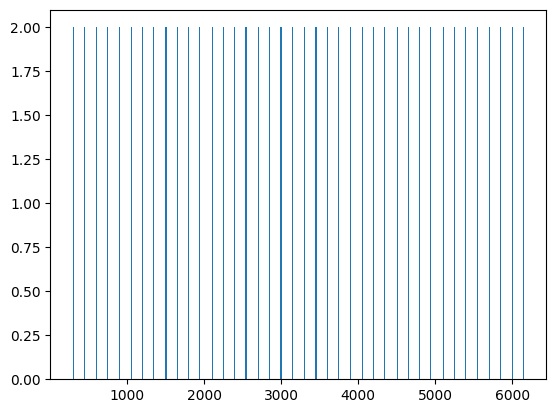

In [16]:
plt.hist(allspikes, bins=400);

In [17]:

if cfg.connect_ThVecStim_S1:

    # for post in Epops: 
    #     convergence_Th_S1['VPM_sTC']['L4_PC'] = 197
    #     convergence_Th_S1['VPM_sTC']['L4_SP'] = 197
    #     convergence_Th_S1['VPM_sTC']['L4_SS'] = 188
    #     convergence_Th_S1['VPM_sTC']['L4_INH'] = 116

    ## Connectivity rules
    synapsesperconnection_Th_S1 = 9.0
    for pre in ['VPM_sTC']:  #  
        if cfg.TC_S1[pre]:
            for post in Epops: 
                
                if 'L4_SS' in post:
                    conn_convergence = np.ceil(188/synapsesperconnection_Th_S1)
                else:
                    conn_convergence = np.ceil(197/synapsesperconnection_Th_S1)

                netParams.connParams['thal_'+pre+'_'+post] = { 
                    'preConds': {'pop': pre},  ####################################################
                    'postConds': {'pop': post},
                    'weight': cfg.TC_S1_weightE,   # synaptic weight 
                    'sec': 'basal', # target postsyn section
                    'delay': 'defaultDelay',
                    'synsPerConn': int(synapsesperconnection_Th_S1),                     
                    'synMech': ESynMech_Th}  

                netParams.connParams['thal_'+pre+'_'+post]['convergence'] = conn_convergence 

            for post in Ipops: 
                
                conn_convergence = np.ceil(116/synapsesperconnection_Th_S1)

                netParams.connParams['thal_'+pre+'_'+post] = { 
                    'preConds': {'pop': pre},  ####################################################
                    'postConds': {'pop': post},
                    'weight': cfg.TC_S1_weightI,   # synaptic weight 
                    'sec': 'somatic', # target postsyn section
                    'delay': 'defaultDelay',
                    'synsPerConn': int(synapsesperconnection_Th_S1),                     
                    'synMech': ESynMech_Th}  

                netParams.connParams['thal_'+pre+'_'+post]['convergence'] = conn_convergence 

print(netParams.connParams.keys())


odict_keys(['thal_VPM_sTC_L4_NBC', 'thal_VPM_sTC_L4_MC', 'thal_VPM_sTC_L4_LBC', 'thal_VPM_sTC_L4_UPC', 'thal_VPM_sTC_L4_TPC', 'thal_VPM_sTC_L4_SSC'])


In [18]:
sim.initialize(
    simConfig = cfg, 	
    netParams = netParams)  				# create network object and set cfg and net params
sim.net.createPops()               			# instantiate network populations


Start time:  2025-03-24 11:48:38.603730


{L4_NBC: <netpyne.network.pop.Pop object at 0x729af884e3d0>, L4_MC: <netpyne.network.pop.Pop object at 0x729af884e4c0>, L4_LBC: <netpyne.network.pop.Pop object at 0x729af884e280>, L4_UPC: <netpyne.network.pop.Pop object at 0x729af884e9d0>, L4_TPC: <netpyne.network.pop.Pop object at 0x729af884e400>, L4_SSC: <netpyne.network.pop.Pop object at 0x729af884e8e0>, VPM_sTC: <netpyne.network.pop.Pop object at 0x729af884e460>}

In [19]:
sim.net.createCells()              			# instantiate network cells based on defined populations


Creating network of 7 cell populations on 1 hosts...
  Number of cells on node 0: 65 
  Done; cell creation time = 4.16 s.


[compartCell_L4_NBC_HH_full_0,
 compartCell_L4_MC_HH_full_1,
 compartCell_L4_LBC_HH_full_2,
 compartCell_L4_LBC_HH_full_3,
 compartCell_L4_UPC_HH_full_4,
 compartCell_L4_UPC_HH_full_5,
 compartCell_L4_UPC_HH_full_6,
 compartCell_L4_UPC_HH_full_7,
 compartCell_L4_UPC_HH_full_8,
 compartCell_L4_UPC_HH_full_9,
 compartCell_L4_UPC_HH_full_10,
 compartCell_L4_UPC_HH_full_11,
 compartCell_L4_UPC_HH_full_12,
 compartCell_L4_UPC_HH_full_13,
 compartCell_L4_UPC_HH_full_14,
 compartCell_L4_UPC_HH_full_15,
 compartCell_L4_UPC_HH_full_16,
 compartCell_L4_UPC_HH_full_17,
 compartCell_L4_UPC_HH_full_18,
 compartCell_L4_UPC_HH_full_19,
 compartCell_L4_TPC_HH_full_20,
 compartCell_L4_TPC_HH_full_21,
 compartCell_L4_TPC_HH_full_22,
 compartCell_L4_TPC_HH_full_23,
 compartCell_L4_TPC_HH_full_24,
 compartCell_L4_TPC_HH_full_25,
 compartCell_L4_TPC_HH_full_26,
 compartCell_L4_TPC_HH_full_27,
 compartCell_L4_TPC_HH_full_28,
 compartCell_L4_TPC_HH_full_29,
 compartCell_L4_TPC_HH_full_30,
 compartCell_L4_TPC

In [20]:
sim.net.connectCells()            			# create connections between cells based on params

Making connections...
  Number of connections on node 0: 63 
  Number of synaptic contacts on node 0: 1134 
  Done; cell connection time = 0.13 s.


[[{preGid: 64, sec: 'soma_0', loc: 0.05555555555555555, synMech: 'AMPA_Th', weight: 0.0001, delay: 0.1, preLoc: 0.5, hObj: NetCon[0]},
  {preGid: 64, sec: 'soma_0', loc: 0.16666666666666666, synMech: 'AMPA_Th', weight: 0.0001, delay: 0.1, preLoc: 0.5, hObj: NetCon[1]},
  {preGid: 64, sec: 'soma_0', loc: 0.2777777777777778, synMech: 'AMPA_Th', weight: 0.0001, delay: 0.1, preLoc: 0.5, hObj: NetCon[2]},
  {preGid: 64, sec: 'soma_0', loc: 0.38888888888888884, synMech: 'AMPA_Th', weight: 0.0001, delay: 0.1, preLoc: 0.5, hObj: NetCon[3]},
  {preGid: 64, sec: 'soma_0', loc: 0.5, synMech: 'AMPA_Th', weight: 0.0001, delay: 0.1, preLoc: 0.5, hObj: NetCon[4]},
  {preGid: 64, sec: 'soma_0', loc: 0.6111111111111112, synMech: 'AMPA_Th', weight: 0.0001, delay: 0.1, preLoc: 0.5, hObj: NetCon[5]},
  {preGid: 64, sec: 'soma_0', loc: 0.7222222222222222, synMech: 'AMPA_Th', weight: 0.0001, delay: 0.1, preLoc: 0.5, hObj: NetCon[6]},
  {preGid: 64, sec: 'soma_0', loc: 0.8333333333333333, synMech: 'AMPA_Th',

In [21]:
sim.net.addStims() 							# add network stimulation

Adding stims...
  Number of stims on node 0: 63 
  Done; cell stims creation time = 0.01 s.


[[{label: 'Input->0', source: 'Input_0', sec: 'soma_0', loc: 0.5, type: 'IClamp', del: 400.0, dur: 12.0, amp: 0.5, hObj: IClamp[0]}],
 [{label: 'Input->1', source: 'Input_1', sec: 'soma_0', loc: 0.5, type: 'IClamp', del: 400.0, dur: 12.0, amp: 0.5, hObj: IClamp[1]}],
 [{label: 'Input->2', source: 'Input_2', sec: 'soma_0', loc: 0.5, type: 'IClamp', del: 400.0, dur: 12.0, amp: 0.5, hObj: IClamp[2]}],
 [{label: 'Input->2', source: 'Input_2', sec: 'soma_0', loc: 0.5, type: 'IClamp', del: 400.0, dur: 12.0, amp: 0.5, hObj: IClamp[3]}],
 [{label: 'Input->3', source: 'Input_3', sec: 'soma_0', loc: 0.5, type: 'IClamp', del: 400.0, dur: 12.0, amp: 0.5, hObj: IClamp[4]}],
 [{label: 'Input->3', source: 'Input_3', sec: 'soma_0', loc: 0.5, type: 'IClamp', del: 400.0, dur: 12.0, amp: 0.5, hObj: IClamp[5]}],
 [{label: 'Input->3', source: 'Input_3', sec: 'soma_0', loc: 0.5, type: 'IClamp', del: 400.0, dur: 12.0, amp: 0.5, hObj: IClamp[6]}],
 [{label: 'Input->3', source: 'Input_3', sec: 'soma_0', loc: 0

In [22]:
sim.setupRecording()              			# setup variables to record for each cell (spikes, V traces, etc)

Recording 19 traces of 1 types on node 0


{spkt: Vector[2421770], spkid: Vector[2421771], V_soma: {cell_0: Vector[2421791], cell_1: Vector[2421792], cell_2: Vector[2421793], cell_3: Vector[2421794], cell_4: Vector[2421795], cell_8: Vector[2421796], cell_11: Vector[2421797], cell_14: Vector[2421798], cell_17: Vector[2421799], cell_20: Vector[2421800], cell_28: Vector[2421801], cell_35: Vector[2421802], cell_42: Vector[2421803], cell_49: Vector[2421804], cell_56: Vector[2421805], cell_58: Vector[2421806], cell_60: Vector[2421807], cell_61: Vector[2421808], cell_62: Vector[2421809]}, _repr_mimebundle_: {}}

In [23]:
sim.runSim()                      			# run parallel Neuron simulation  

0.0s

Running simulation using NEURON for 400.0 ms...
0.1s
0.2s
0.3s
0.4s
  Done; run time = 119.05 s; real-time ratio: 0.00.


In [24]:
sim.gatherData();                  			# gather spiking data and cell info from each node


Gathering data...
  Done; gather time = 2.46 s.

Analyzing...
  Cells: 65
  Connections: 63 (0.97 per cell)
  Synaptic contacts: 1134 (17.45 per cell)
  Spikes: 2 (0.08 Hz)
  Simulated time: 0.4 s; 1 workers
  Run time: 119.05 s
   L4_NBC : 0.000 Hz
   L4_MC : 0.000 Hz
   L4_LBC : 0.000 Hz
   L4_UPC : 0.000 Hz
   L4_TPC : 0.000 Hz
   L4_SSC : 0.000 Hz
   VPM_sTC : 2.500 Hz


In [25]:
# Calcular o firing rate
spk_times = sim.simData['spkt']  # Tempos de spikes
spk_ids = sim.simData['spkid']  # IDs dos neurônios

steps, rates = np.unique(spk_ids, return_counts=True)
steps, rates/0.6

(array([63., 64.]), array([1.66666667, 1.66666667]))

In [26]:
sim.saveData()                    			# save params, cell info and sim output to file (pickle,mat,txt,etc)#
# sim.analysis.plotData()         			# plot spike raster etc

[]

In [27]:
# sim.analysis.plotSpikeStats(timeRange=[300,900], figSize=(18,6))

Preparing spike data...
Plotting raster...


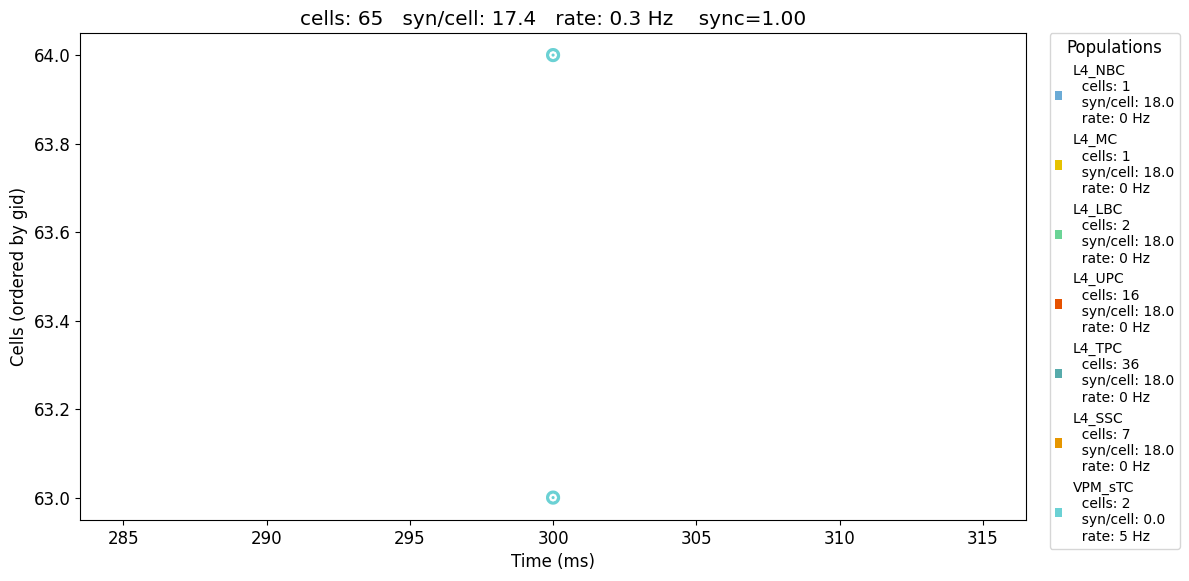

In [ ]:
sim.analysis.plotRaster(timeRange=[300,400], figSize=(12,6), popRates=True, marker='o', lw=8, markerSize=15);

Plotting recorded cell traces ... trace


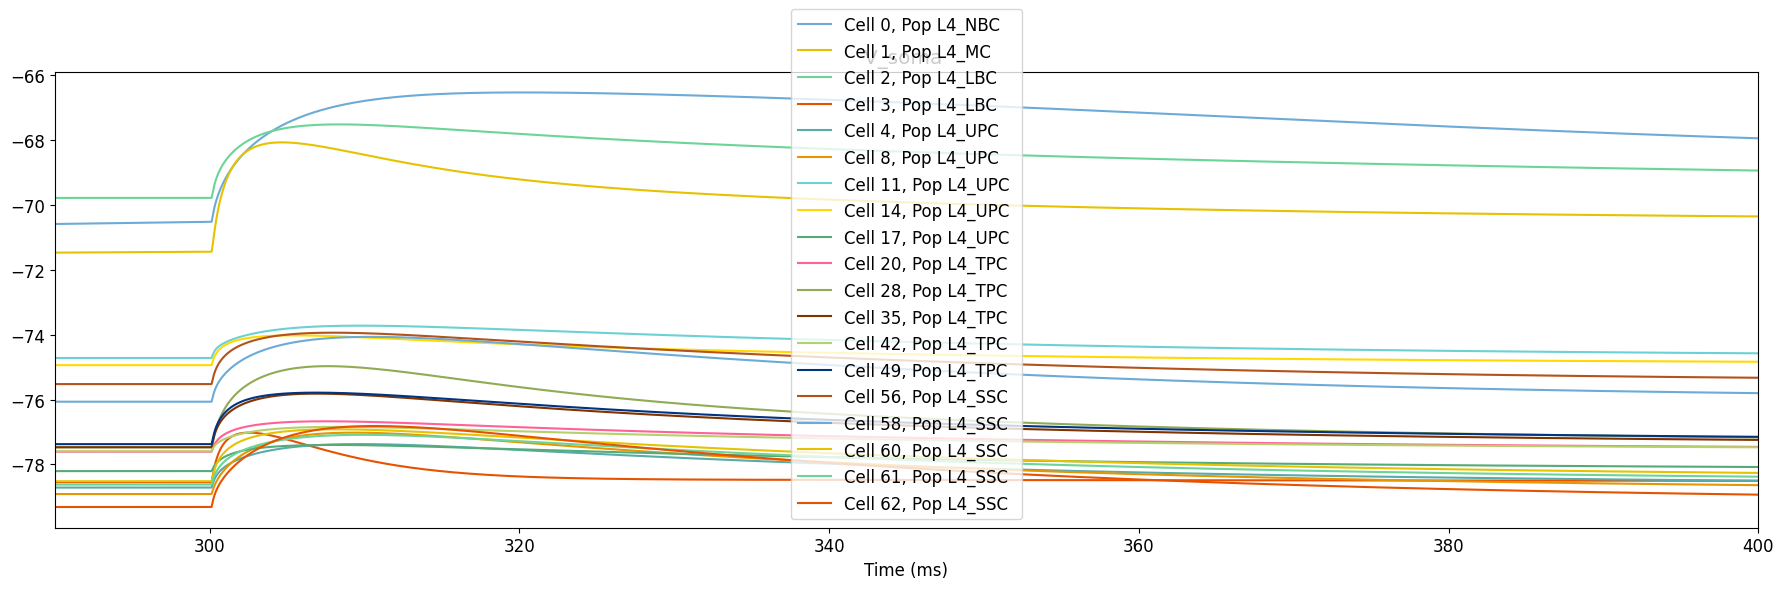

In [29]:
sim.analysis.plotTraces(timeRange=[290,400], overlay=True, oneFigPer='trace', figSize=(18,6));

Plotting recorded cell traces ... trace


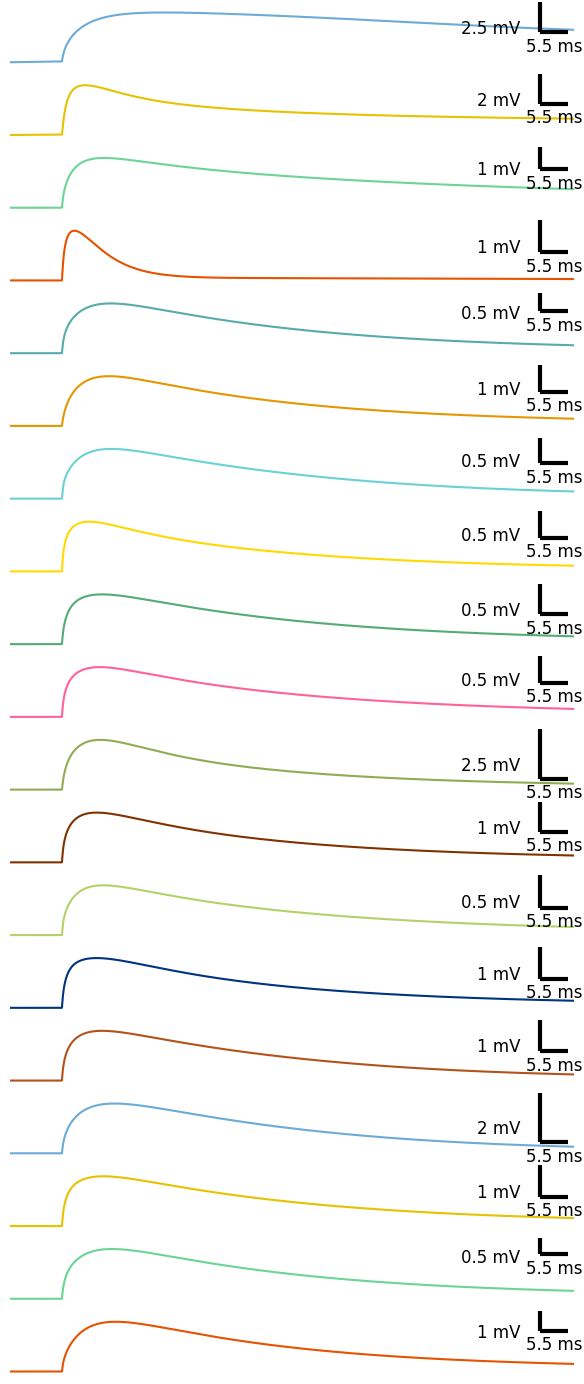

In [39]:
# sim.analysis.plotTraces(include= [ii for ii in range(9)], ylim=[-80,-60], timeRange=[300,320], overlay=False, oneFigPer='trace', figSize=(6,36));
sim.analysis.plotTraces(timeRange=[290,400], axis=False, overlay=False, oneFigPer='trace', figSize=(6,14), subtitles=None);

In [51]:
Nmorphocells = len(sim.net.cells) - cfg.cellNumber['VPM_sTC']

Plotting 3D cell shape ...


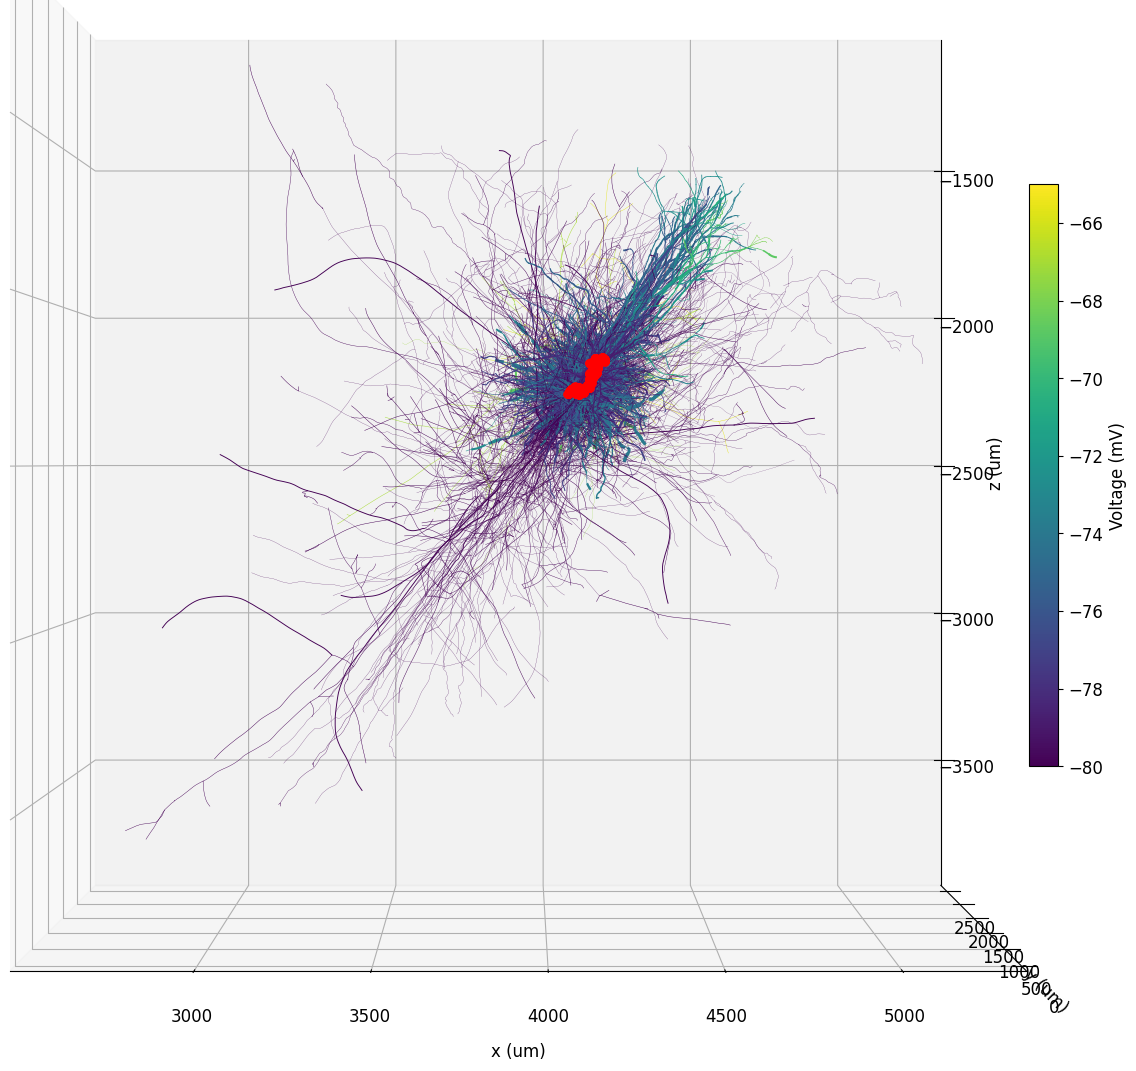

In [53]:
sim.analysis.plotShape(includePre= [ii for ii in range(0,Nmorphocells,2)], includePost= [ii for ii in range(0,Nmorphocells,2)], 
        includeAxon=True, showSyns=True, showElectrodes=False,
        cvar= 'voltage', dist=0.6, elev=0, azim=-90, 
        axisLabels=True, synStyle='o', 
        clim= [-80, -65], showFig=False, synSize=5, saveFig=False, figSize=(12,12));

Plotting 3D cell shape ...


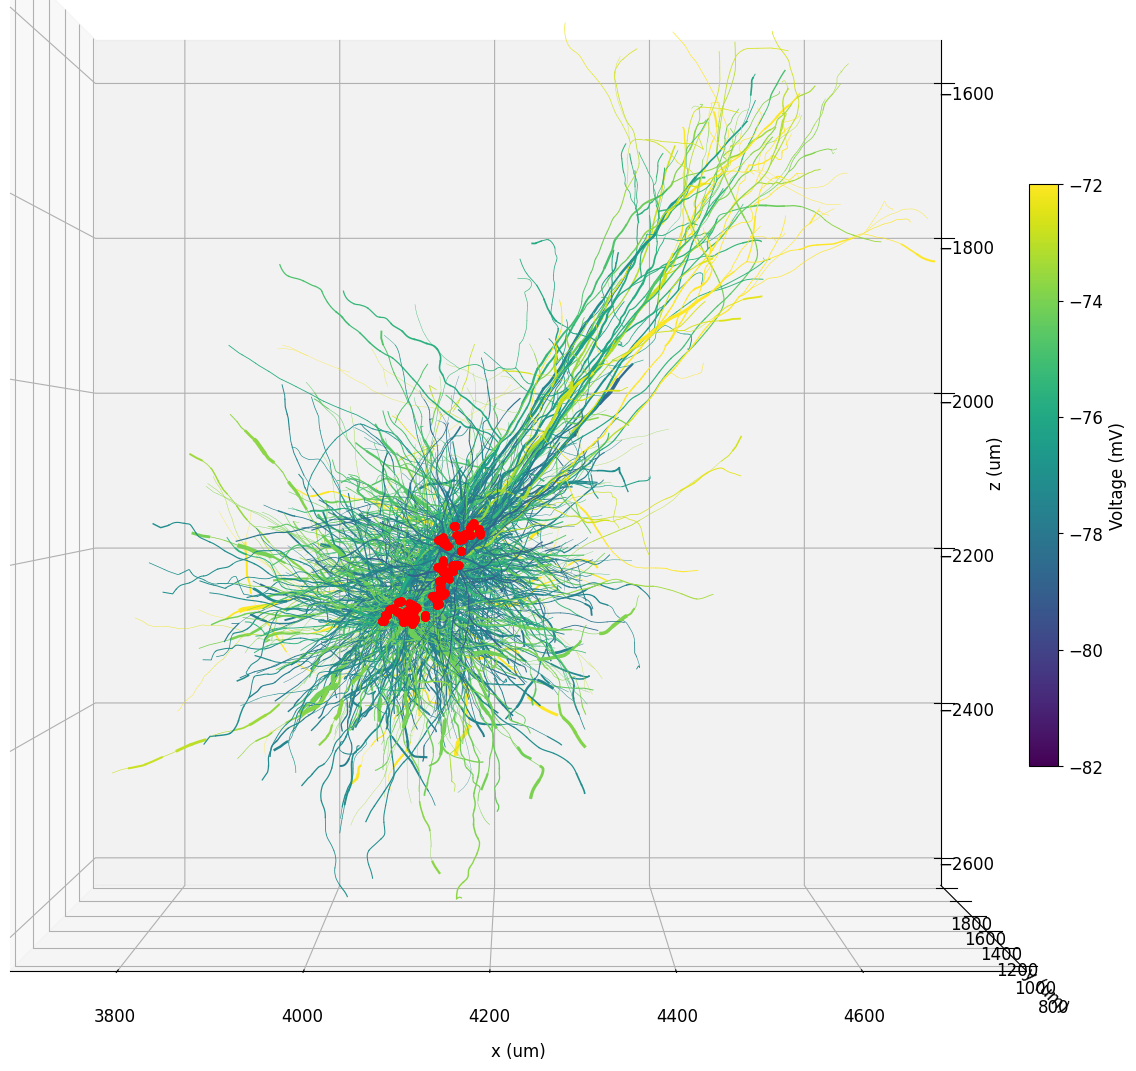

In [54]:
sim.analysis.plotShape(includePre= [ii for ii in range(0,Nmorphocells,2)], includePost= [ii for ii in range(0,Nmorphocells,2)], 
        includeAxon=False, showSyns=True, showElectrodes=False,
        cvar= 'voltage', dist=0.6, elev=0, azim=-90, 
        axisLabels=True, synStyle='o', 
        clim= [-82, -72], showFig=False, synSize=5, saveFig=False, figSize=(12,12));